In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

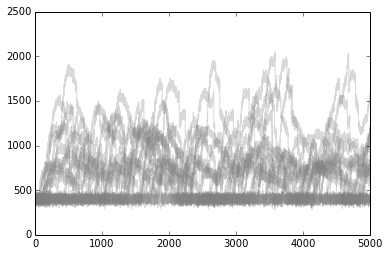

0.577548027039


In [2]:
#code used for creation of set1 of simulated data
import time

def alphaKernel (t, A,t_A,t_B):
    return np.float64(A*(np.exp(-t/t_A)-np.exp(-t/t_B)))

startTime = time.time()
xMatrix = np.ndarray(shape=(5000,20),dtype='float32')
apList = []
for i in np.nditer(xMatrix,order='F',flags=['external_loop'],op_flags=['writeonly']):
    localAPlist = []
    xtest = np.repeat(400,5000.)
    xnoise = 30. * np.random.normal(size = xtest.size)
    xtest = xtest +xnoise
    apNumber = int(np.random.normal(loc=4,scale = 2)*3)
    
    for j in range(apNumber):
        xdata = np.arange(0,int(400*np.random.normal(loc=1,scale=0.3)),1.)
        y = (alphaKernel(xdata,np.random.normal(loc=5,scale=0.3) * 200,
                        150* np.random.normal(loc=2,scale=0.3),50*np.random.normal(loc=2,scale=0.3)))
        APposition = int(np.random.sample(size=1)* 5000)
        localAPlist.append(APposition)
        if(APposition + y.size > xtest.size):
            y.resize(xtest.size-APposition)
        xtest[APposition:APposition + y.size] = xtest[APposition:APposition + y.size] + y
    i[...] = xtest
    plt.plot(xtest,'grey',alpha=0.3)
    apList.append(localAPlist)
plt.show()
print time.time() - startTime
np.savetxt('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/set1',xMatrix,delimiter=',',fmt='%4.6f')

In [32]:
import pandas as pd
df = pd.DataFrame(apList)
df.to_csv('/home/maximilian/unistuff/paris_ens/cal_neuroim/simdata/apTimings.csv',index=False)

In [19]:
xMatrix

array([[ 346.90899658,  404.69784546,  453.68609619, ...,  399.23324585,
         408.32736206,  341.13568115],
       [ 403.62438965,  405.97671509,  430.29882812, ...,  437.72940063,
         383.19564819,  383.09783936],
       [ 352.47293091,  363.60583496,  408.57965088, ...,  404.2020874 ,
         455.6444397 ,  431.84640503],
       ..., 
       [ 935.26934814,  421.58297729,  857.9654541 , ...,  779.222229  ,
         450.40823364,  418.33724976],
       [ 888.2713623 ,  399.89849854,  858.11645508, ...,  735.29174805,
         419.39898682,  363.65939331],
       [ 926.7545166 ,  368.88128662,  883.68280029, ...,  729.07666016,
         369.40011597,  387.74349976]], dtype=float32)